In [293]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
import pickle
from tqdm import tqdm

In [270]:
labels = pd.read_csv('./train_label.csv')

In [271]:
labels.head()

,name,height,left,top,width,label
0,1.png,219,246,77,81,1
1,1.png,219,323,81,96,9
2,2.png,32,77,29,23,2
3,2.png,32,98,25,26,3
4,3.png,15,17,5,8,2


In [283]:
train_path = '../data/train/' #### TO BE CHANGEDDDDD
train_images = os.listdir(train_path)

In [284]:
def get_cropped(labels, i):
    image = cv2.imread(os.path.join(train_path, labels['name'][index]))
    x1 = labels['top'][i]
    if (x1 < 0): 
        x1 = 0
    x2 = x1 + labels['height'][i]
    #if x2 < 0: x2 = 0
    y1 = labels['left'][i]
    if (y1 < 0): 
        y1 = 0
    y2 = y1 + labels['width'][i]
    #if y2 < 0: y2 = 0
    cropimg = image[x1:x2,y1:y2,:]
    
    return cropimg

In [288]:
def resize_img(img, option = 0):
    #option 0: 16x32
    #option 1: 8x16
    if option == 0:
        dim = (16,32)
    elif option == 1:
        dim = (8,16)
    #print(img.shape)
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img_resized

In [294]:
filename = 'HOG_16x32'
num_desc = 72
tosave = np.zeros((len(train_images), num_desc))
for i in tqdm(range(len(train_images))):
    I = get_cropped(labels, i)
    I = resize_img(I, option =0)
    desc= hog(todisp, pixels_per_cell = (8,8), cells_per_block = (4,2))
    #print(tosave[i,:].shape)
    
    #print('i is', i)
    tosave[i,:] = desc 

100%|██████████| 33404/33404 [02:36<00:00, 213.75it/s]


In [297]:
fileObj = open('./' + filename, 'wb')
pickle.dump(tosave, fileObj)

In [302]:
tosave[0:1,:]

array([[0.08865121, 0.03908276, 0.04266275, 0.02193004, 0.0985876 ,
        0.04505753, 0.05149832, 0.04057649, 0.07506553, 0.33133469,
        0.08177384, 0.15747951, 0.06109288, 0.0507671 , 0.05123695,
        0.        , 0.08176088, 0.12664996, 0.13236724, 0.01246605,
        0.01459592, 0.02312303, 0.08635383, 0.04736925, 0.02969023,
        0.03754305, 0.04599578, 0.33133469, 0.12888973, 0.00552679,
        0.01588983, 0.05204059, 0.        , 0.00773644, 0.01496989,
        0.13670478, 0.33133469, 0.07582122, 0.029067  , 0.02593306,
        0.05725895, 0.03265404, 0.02576514, 0.03069959, 0.05157627,
        0.33133469, 0.08518856, 0.00552679, 0.01854749, 0.03793283,
        0.00592334, 0.01505464, 0.03623455, 0.05135525, 0.13449043,
        0.0940315 , 0.10699521, 0.16413676, 0.27435963, 0.15503402,
        0.03335249, 0.07089774, 0.04161869, 0.0852199 , 0.0191071 ,
        0.02455312, 0.14106103, 0.33133469, 0.20747629, 0.0374239 ,
        0.04960112, 0.08226533]])

(219, 81, 3)
1.png


name      1.png
height      219
left        246
top          77
width        81
label         1
Name: 0, dtype: object

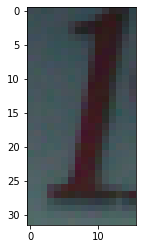

In [281]:
index = 0
#image = cv2.imread(os.path.join(train_path, labels['name'][index]))
todisp = resize_img(get_cropped(labels, index))
plt.imshow(todisp)
print(labels['name'][index])
labels.loc[index]

In [282]:
todisp.shape

(32, 16, 3)

In [277]:
des , hogim = hog(todisp, pixels_per_cell = (8,8), cells_per_block = (4,2), visualize = True)


In [278]:
des.shape

(72,)

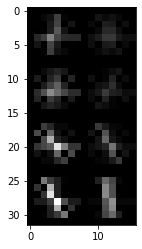

In [279]:
plt.imshow(hogim, cmap = 'gray')